In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Additional features


In [18]:
df = pd.read_csv('full_dataset.csv')
df.platform.value_counts()

twitter      488167
reddit        72135
instagram     15652
youtube       11304
Name: platform, dtype: int64

In [20]:
df_twitter = df.loc[df.platform=='twitter'].sample(11304)
df_reddit = df.loc[df.platform=='reddit'].sample(11304)
df_youtube = df.loc[df.platform=='youtube']
df_instagram = df.loc[df.platform=='instagram'].sample(11304)

In [23]:
df_small = pd.concat([df_twitter, df_reddit, df_youtube, df_instagram])

In [25]:
df_small.platform.value_counts()

reddit       11304
twitter      11304
instagram    11304
youtube      11304
Name: platform, dtype: int64

In [ ]:
df_.to_csv

Positivity is the positive_words and negative_words balance.
Intensity is the sum of pos and neg

In [4]:
df['positivity_normalized'] = (df.positive_words - df.negative_words)/df.word_count
df['intensity_normalized'] = (df.positive_words + df.negative_words)/df.word_count
df.sample(5)

,Unnamed: 0,text,platform,positive_words,negative_words,length,word_count,male_words,female_words,afinn,positivity_normalized,intensity_normalized
404752,404752,This new normal is absolutely abnormal,twitter,0,1,38,6,0,0,0.0,-0.166667,0.166667
501678,501678,vintage Paris Hilton vibes,instagram,0,0,27,4,0,0,0.0,0.000000,0.000000
381996,381996,If they dropped another Jak I'd switch to PS w...,twitter,0,0,63,12,0,0,-2.0,0.000000,0.000000
15431,15431,missed baptisms at la jolla shores. its like m...,twitter,1,1,95,16,0,0,-1.0,0.000000,0.125000
327119,327119,"Dear People of the North, It's high time we t...",twitter,1,1,123,23,0,0,2.0,0.000000,0.086957


# Plots

this pairplot takes a while to run


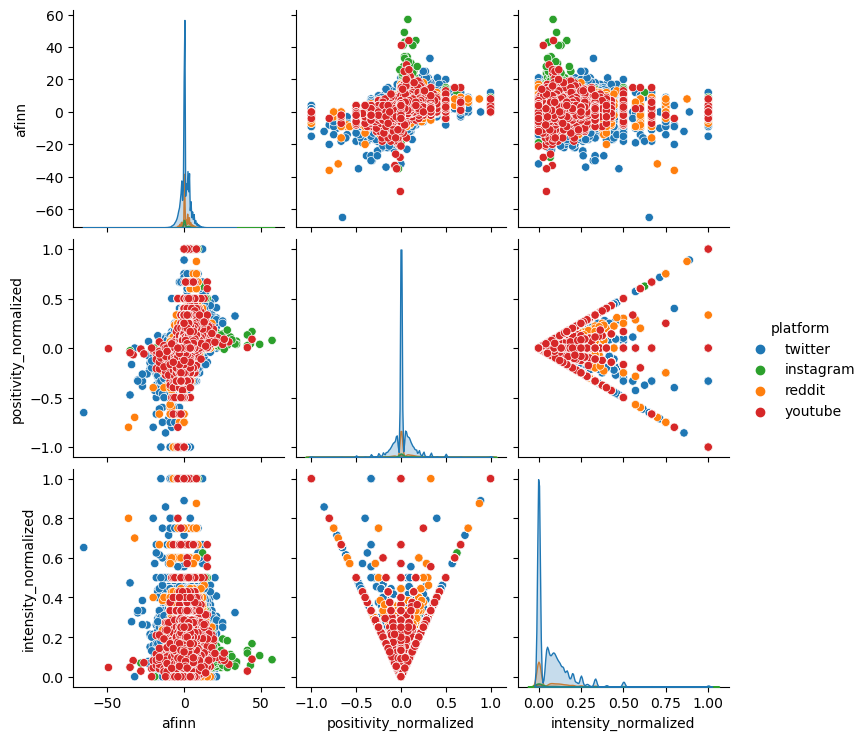

In [96]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
sns.pairplot(data = df,
            x_vars = ['afinn', 'positivity_normalized', 'intensity_normalized'],
            y_vars = ['afinn', 'positivity_normalized', 'intensity_normalized'], 
            hue='platform',
            palette = palette)

plt.show()

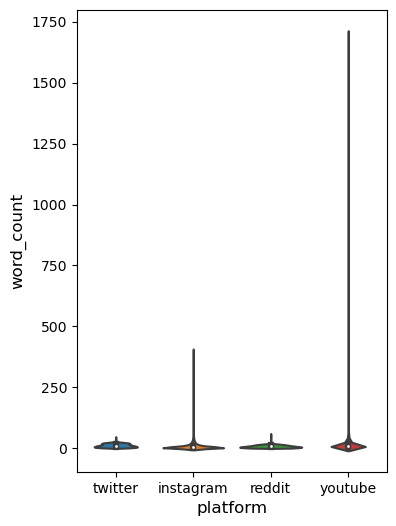

In [91]:
plt.figure(figsize=(4,6))

sns.violinplot(data=df,
               x = 'platform',
               y = 'word_count',
               legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("platform", fontsize=12)
plt.ylabel("word_count", fontsize=12)

plt.show()

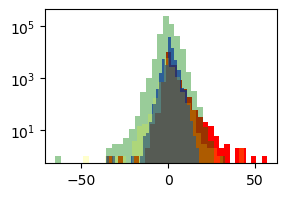

In [68]:
plt.figure(figsize = (3, 2))
plt.hist(df.loc[df.platform_code==0,].afinn, bins = 30, color='red')
plt.hist(df.loc[df.platform_code==1,].afinn, bins = 30, color='blue', alpha=0.7)
plt.hist(df.loc[df.platform_code==2,].afinn, bins = 30, color='green', alpha=0.4)
plt.hist(df.loc[df.platform_code==3,].afinn, bins = 30, color='yellow', alpha=0.2)

plt.yscale('log')
plt.show()

<Axes: xlabel='platform_code', ylabel='intensity'>

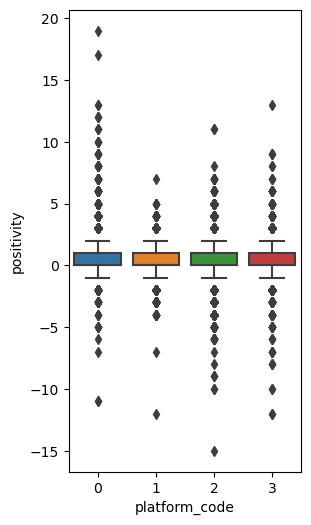

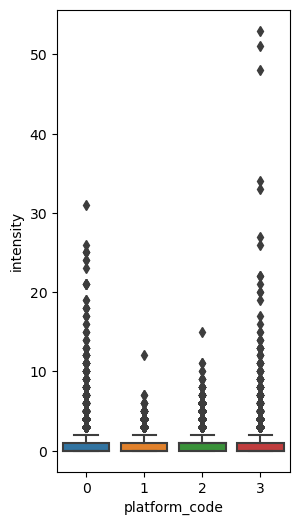

In [93]:
plt.figure(figsize=(3, 6))
sns.boxplot(data=df, y='positivity', x='platform_code')
plt.figure(figsize=(3, 6))
sns.boxplot(data=df, y='intensity', x='platform_code')

<Axes: xlabel='platform_code', ylabel='negative_words'>

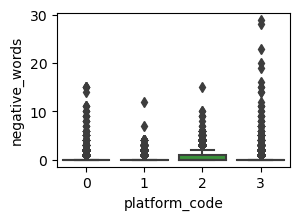

In [71]:
plt.figure(figsize=(3,2))

sns.boxplot(data=df, y='negative_words', x='platform_code')

# Logistic regression
use stratified kfold split

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [6]:
df = df.dropna()

In [12]:
df_train, df_test = train_test_split(df.copy(), shuffle=True, test_size=.1, random_state=5,stratify=df.platform)

n_splits = 5
kfold = StratifiedKFold(n_splits, shuffle=True, random_state = 404)
## Fill in your list of features
features = ['word_count', 'afinn', 'positivity_normalized', 'intensity_normalized']

## Make your array of zeros to hold the accuracies
log_reg_accs = np.zeros((n_splits, len(features)))

In [16]:
## Loop through the cv splits
i = 0
for train_index, test_index in kfold.split(df_train,df_train.platform):
    ## get the training and holdout sets
    df_tt = df_train.iloc[train_index]
    df_ho = df_train.iloc[test_index]
    
    ## loop through your features
    j = 0
    for feature in features:
        ## Define the model
        log_reg = LogisticRegression(penalty='none')
        
        ## fit the model
        log_reg = log_reg.fit(df_tt[feature].values.reshape(-1, 1), df_tt['platform'].values)
        
        ## Make the prediction
        pred = log_reg.predict(df_ho[feature].values.reshape(-1, 1))
        
        ## Record the accuracy on the holdout set
        log_reg_accs[i,j] = accuracy_score(df_ho['platform'].values, pred)
        print(confusion_matrix(df_ho['platform'].values, pred, labels=["instagram", "twitter", "reddit", "youtube"]))
        j = j + 1
    i = i + 1
    
np.mean(log_reg_accs, axis=0)

[[    0  1352     0     2]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    1  1353     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1013     0     4]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1354     0     0]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1017     0     0]]
[[    0  1349     0     5]
 [    0 43935     0     0]
 [    0  6492     0     0]
 [    0  1015     0     2]]
[[    0  1354     0

array([0.83216789, 0.83213758, 0.83212811, 0.83212811])

In [110]:
print(log_reg_accs)

[[0.83213379 0.83215273 0.83213379 0.83213379]
 [0.83220955 0.83213379 0.83213379 0.83213379]
 [0.83217167 0.83213379 0.83213379 0.83213379]
 [0.83217167 0.83213379 0.83213379 0.83213379]
 [0.83219061 0.83213379 0.83213379 0.83213379]
 [0.83217167 0.83215273 0.83213379 0.83213379]
 [0.83213379 0.83215273 0.83213379 0.83213379]
 [0.83220955 0.83213379 0.83211485 0.83211485]
 [0.83213379 0.83213379 0.83211485 0.83211485]
 [0.83215273 0.83211485 0.83211485 0.83211485]]


# finding
Here we are fitting logistic regression using word_count, afinn, positivity and instensity individually. 
The confusion matrix has true labels on the rows, prediction on the columns. 
Most model just predict all points as twitter. 
The accuracy was high but the model itself is a trivial one. 
It will not generate well. 

We may need to use balance the dataset by undersample twitter data. 